# Lab 3
- Structured API Approach

In [39]:
from pyspark.sql import SparkSession
import os

# Set JAVA_HOME explicitly
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-21-openjdk-amd64'

spark = SparkSession.builder \
    .appName("MySparkApp") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

In [40]:
# Reduce Spark's verbose logging
spark.sparkContext.setLogLevel("WARN")
print("Spark logging level set to WARN - output will be cleaner now!")

Spark logging level set to WARN - output will be cleaner now!


## Important Note About Spark "Errors"

When you run Spark code, you might see messages with `[error]` prefix. **These are NOT actual errors!** 

They are Spark's normal startup logs being displayed through the error stream. The program works perfectly fine.

- `INFO` messages = Normal operation information
- `WARN` messages = Warnings (usually safe to ignore)
- Only `ERROR` messages indicate real problems

The cell above sets logging to `WARN` level to reduce verbose output.

In [41]:
spark   

## Data Before Processing

In [61]:
df_before = spark.read.format('csv').load("/home/aaronpham/Coding/bigdata/spark/spark_mllib/data/creditcard.csv", header=True, inferSchema=True)
df_before.printSchema()

root
 |-- Time: integer (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (null

=== ENHANCED DATA DISTRIBUTION ANALYSIS ===


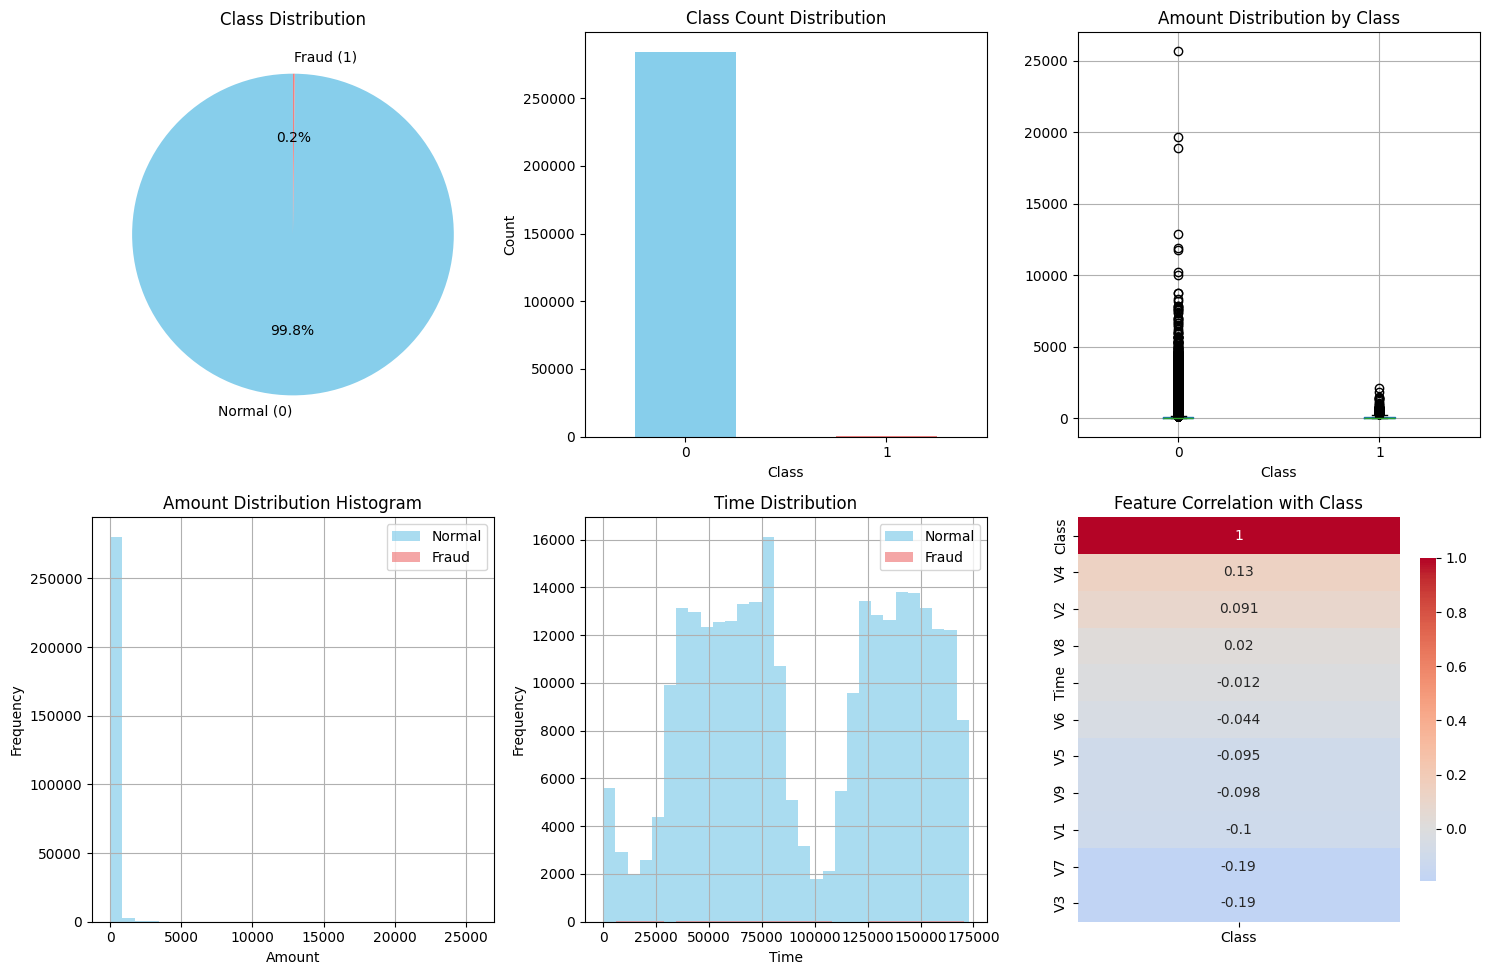

In [63]:
# Add this cell after your existing "Amount Distribution Analysis" cell

# Enhanced Data Distribution Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import col, count, mean, stddev, min as spark_min, max as spark_max

# Convert to Pandas for better visualization
df_pandas = df_before.toPandas()

print("=== ENHANCED DATA DISTRIBUTION ANALYSIS ===")

# 1. Class Distribution Visualization
plt.figure(figsize=(15, 10))

# Class distribution pie chart
plt.subplot(2, 3, 1)
class_counts = df_pandas['Class'].value_counts()
labels = ['Normal (0)', 'Fraud (1)']
colors = ['skyblue', 'lightcoral']
plt.pie(class_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')

# Class distribution bar chart
plt.subplot(2, 3, 2)
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Count Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Amount Distribution by Class
plt.subplot(2, 3, 3)
df_pandas.boxplot(column='Amount', by='Class', ax=plt.gca())
plt.title('Amount Distribution by Class')
plt.suptitle('')  # Remove default title

# 3. Amount histogram by class
plt.subplot(2, 3, 4)
df_pandas[df_pandas['Class'] == 0]['Amount'].hist(alpha=0.7, label='Normal', bins=30, color='skyblue')
df_pandas[df_pandas['Class'] == 1]['Amount'].hist(alpha=0.7, label='Fraud', bins=30, color='lightcoral')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution Histogram')
plt.legend()

# 4. Time distribution (if available)
if 'Time' in df_pandas.columns:
    plt.subplot(2, 3, 5)
    df_pandas[df_pandas['Class'] == 0]['Time'].hist(alpha=0.7, label='Normal', bins=30, color='skyblue')
    df_pandas[df_pandas['Class'] == 1]['Time'].hist(alpha=0.7, label='Fraud', bins=30, color='lightcoral')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Time Distribution')
    plt.legend()

# 5. Feature correlation heatmap (sample of features)
plt.subplot(2, 3, 6)
# Select a subset of features for correlation analysis
feature_cols = [col for col in df_pandas.columns if col not in ['Class']][:10]  # First 10 features
corr_matrix = df_pandas[feature_cols + ['Class']].corr()
sns.heatmap(corr_matrix[['Class']].sort_values('Class', ascending=False), 
            annot=True, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation with Class')

plt.tight_layout()
plt.show()

## Data After Preprocessing

In [42]:
df = spark.read.format('csv').load("/home/aaronpham/Coding/bigdata/spark/spark_mllib/data/creditcard_balanced_single.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- Time: integer (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (null

In [43]:
df.show(5)

+----+-----------------+-----------------+------------------+----------------+------------------+-------------------+-----------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+-----------------+-----------------+-------------------+-----------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------+-----+
|Time|               V1|               V2|                V3|              V4|                V5|                 V6|               V7|                 V8|                V9|               V10|               V11|               V12|               V13|              V14|                 V15|              V16|              V17|                V18|              V19|                V20|               V21|                V22|               V23|       

=== ENHANCED DATA DISTRIBUTION ANALYSIS ===


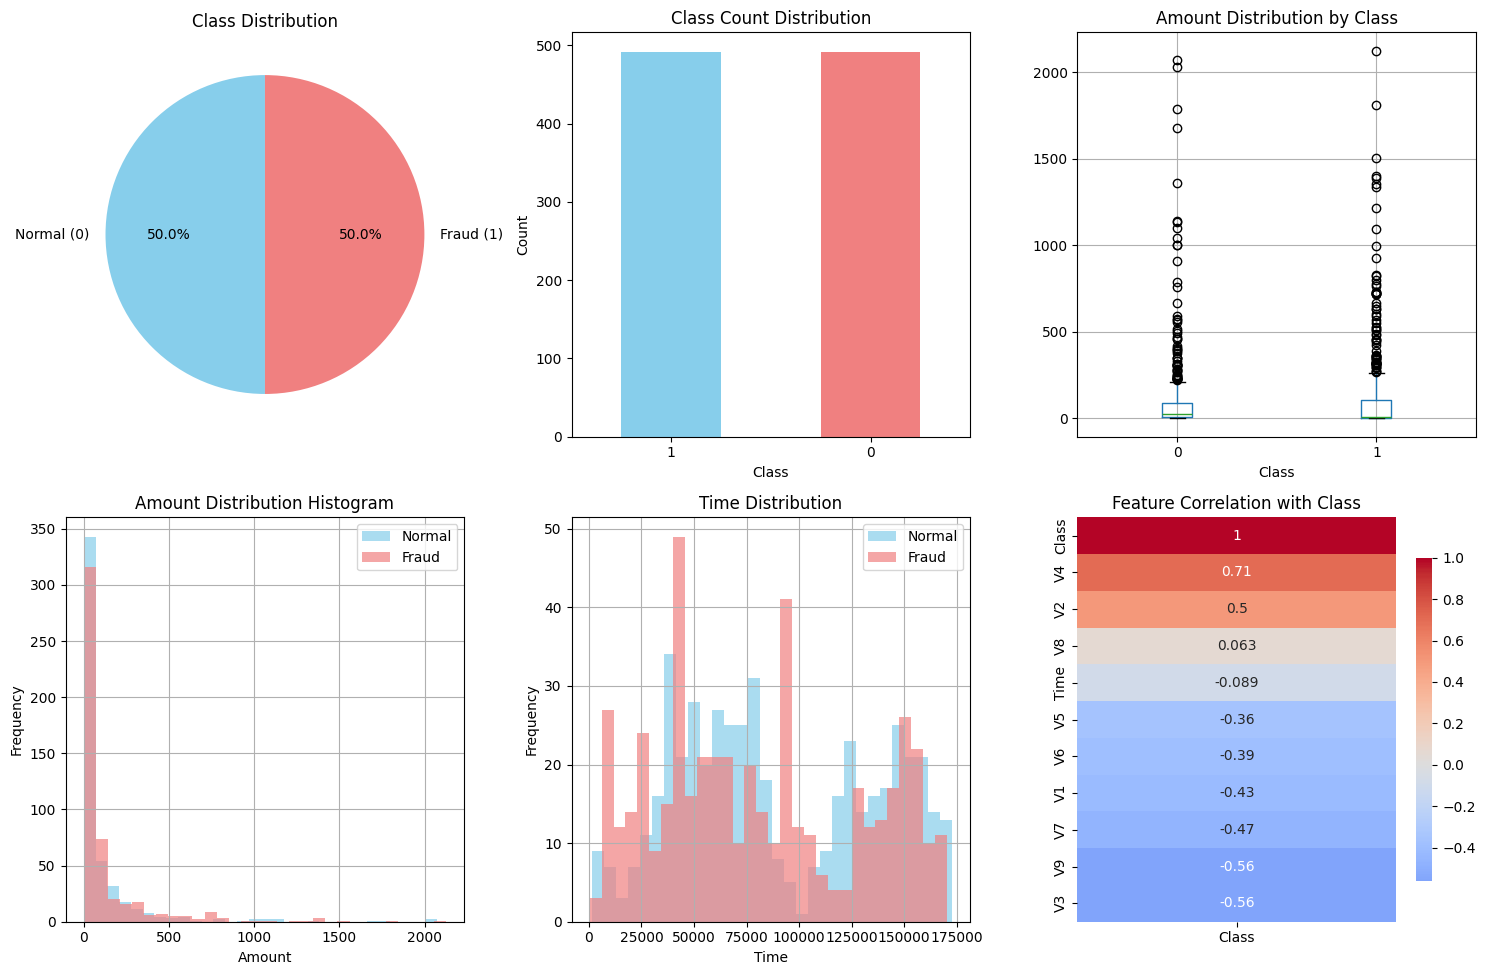

In [58]:
# Add this cell after your existing "Amount Distribution Analysis" cell

# Enhanced Data Distribution Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import col, count, mean, stddev, min as spark_min, max as spark_max

# Convert to Pandas for better visualization
df_pandas = df.toPandas()

print("=== ENHANCED DATA DISTRIBUTION ANALYSIS ===")

# 1. Class Distribution Visualization
plt.figure(figsize=(15, 10))

# Class distribution pie chart
plt.subplot(2, 3, 1)
class_counts = df_pandas['Class'].value_counts()
labels = ['Normal (0)', 'Fraud (1)']
colors = ['skyblue', 'lightcoral']
plt.pie(class_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')

# Class distribution bar chart
plt.subplot(2, 3, 2)
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Count Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Amount Distribution by Class
plt.subplot(2, 3, 3)
df_pandas.boxplot(column='Amount', by='Class', ax=plt.gca())
plt.title('Amount Distribution by Class')
plt.suptitle('')  # Remove default title

# 3. Amount histogram by class
plt.subplot(2, 3, 4)
df_pandas[df_pandas['Class'] == 0]['Amount'].hist(alpha=0.7, label='Normal', bins=30, color='skyblue')
df_pandas[df_pandas['Class'] == 1]['Amount'].hist(alpha=0.7, label='Fraud', bins=30, color='lightcoral')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution Histogram')
plt.legend()

# 4. Time distribution (if available)
if 'Time' in df_pandas.columns:
    plt.subplot(2, 3, 5)
    df_pandas[df_pandas['Class'] == 0]['Time'].hist(alpha=0.7, label='Normal', bins=30, color='skyblue')
    df_pandas[df_pandas['Class'] == 1]['Time'].hist(alpha=0.7, label='Fraud', bins=30, color='lightcoral')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Time Distribution')
    plt.legend()

# 5. Feature correlation heatmap (sample of features)
plt.subplot(2, 3, 6)
# Select a subset of features for correlation analysis
feature_cols = [col for col in df_pandas.columns if col not in ['Class']][:10]  # First 10 features
corr_matrix = df_pandas[feature_cols + ['Class']].corr()
sns.heatmap(corr_matrix[['Class']].sort_values('Class', ascending=False), 
            annot=True, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation with Class')

plt.tight_layout()
plt.show()

In [44]:
df.count()

984

## Split the dataset into train & test

In [45]:
df.groupBy("Class").count().show()

+-----+-----+
|Class|count|
+-----+-----+
|    1|  492|
|    0|  492|
+-----+-----+



In [46]:
# split dataset into train and test
train, test = df.randomSplit([0.8, 0.2])

train, test

(DataFrame[Time: int, V1: double, V2: double, V3: double, V4: double, V5: double, V6: double, V7: double, V8: double, V9: double, V10: double, V11: double, V12: double, V13: double, V14: double, V15: double, V16: double, V17: double, V18: double, V19: double, V20: double, V21: double, V22: double, V23: double, V24: double, V25: double, V26: double, V27: double, V28: double, Amount: double, Class: int],
 DataFrame[Time: int, V1: double, V2: double, V3: double, V4: double, V5: double, V6: double, V7: double, V8: double, V9: double, V10: double, V11: double, V12: double, V13: double, V14: double, V15: double, V16: double, V17: double, V18: double, V19: double, V20: double, V21: double, V22: double, V23: double, V24: double, V25: double, V26: double, V27: double, V28: double, Amount: double, Class: int])

## Replace null value with average value

In [47]:
# Replace the null value with average value
from pyspark.ml.feature import Imputer

numerical_features_lst = train.columns

imputer = Imputer(inputCols=numerical_features_lst, outputCols=numerical_features_lst)

imputer = imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

train.show(3)

+----+-----------------+-----------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+------------------+------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-------------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------+-----+
|Time|               V1|               V2|               V3|              V4|                V5|                V6|               V7|                 V8|                V9|               V10|                 V11|               V12|               V13|              V14|              V15|              V16|               V17|                V18|              V19|              V20|               V21|                V22|               V23|               V2

## Aggregate all columns into one features

In [48]:
from pyspark.ml.feature import StandardScaler, VectorAssembler

# Pick all features into one feature
input_cols = [c for c in df.columns if c != "Class"]

# Assemble into 1 vectors
assembler = VectorAssembler(inputCols=input_cols, outputCol="features_assembled")

In [49]:
train = assembler.transform(train)
test = assembler.transform(test)

train.show(2)

+----+----------------+-----------------+-----------------+---------------+------------------+-----------------+-----------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-------------------+-----------------+-----------------+-----------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------+-----+--------------------+
|Time|              V1|               V2|               V3|             V4|                V5|               V6|               V7|                 V8|                V9|               V10|               V11|               V12|               V13|              V14|              V15|              V16|              V17|                V18|              V19|              V20|              V21|                V22|               V23|          

## Standardize the dataset
- Format the data in to a fixed range for further ML processing

For each value it will apply the following algorithms

```
scaled_value = (original_value - mean) / standard_deviation
```

In [50]:
# scale the features 
scaler = StandardScaler(inputCol="features_assembled", outputCol="features", withStd=True, withMean=True)

scaler_model = scaler.fit(train)

train = scaler_model.transform(train)
test = scaler_model.transform(test)

train.show(3)

+----+-----------------+-----------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+------------------+------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-------------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------+-----+--------------------+--------------------+
|Time|               V1|               V2|               V3|              V4|                V5|                V6|               V7|                 V8|                V9|               V10|                 V11|               V12|               V13|              V14|              V15|              V16|               V17|                V18|              V19|              V20|               V21|              

In [51]:
train.select('features').take(3)

[Row(features=DenseVector([-1.797, 0.01, 0.048, 0.3113, 0.5271, 0.26, -0.3932, 0.0412, 0.223, -0.668, 0.0199, 0.4468, 0.0569, -0.5256, -0.1595, 0.417, 0.276, 0.0904, 0.4743, 0.0217, -0.0467, 0.0533, -0.0255, -0.3993, 0.6703, 0.0168, 0.2993, 0.1775, -0.3978, -0.4739])),
 Row(features=DenseVector([-1.7956, -0.1236, -1.3634, 0.7435, -0.0167, 0.7061, -0.194, 0.5487, -0.0979, 0.434, 0.4538, -0.8599, 0.5788, 0.7009, 0.3874, 2.0613, 0.7938, 0.6628, 1.2016, -0.0837, 1.9226, 0.1102, 0.4018, 1.1524, -0.3956, 0.3654, -0.3548, -0.3218, 0.002, 1.7818])),
 Row(features=DenseVector([-1.7785, -0.1957, -1.1425, 0.6185, -0.4243, 0.7967, 0.2834, 0.5846, -0.09, 0.8323, 0.5194, -0.7132, 0.8525, 0.8377, 0.3329, -1.5789, 0.8325, 0.511, 0.9369, -0.0141, -1.4958, -0.3481, 0.6857, 1.8396, -1.4519, 0.499, -0.9236, 0.1772, -1.6869, 0.1321]))]

# Logistic Regression 

In [52]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="Class")

lr


LogisticRegression_f2b81cfab191

In [53]:
model = lr.fit(train)

pred_train_df = model.transform(train)

pred_train_df.show(5)

+----+-----------------+-----------------+-------------------+-------------------+------------------+------------------+-----------------+-------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-----------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------+-----+--------------------+--------------------+--------------------+--------------------+----------+
|Time|               V1|               V2|                 V3|                 V4|                V5|                V6|               V7|                 V8|                  V9|               V10|                 V11|               V12|               V13|               V14|               V15|               V16|               V17|             

## Prediction

In [54]:
pred_test_df = model.transform(test)
pred_test_df.show(10)

+-----+------------------+--------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+--------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------+-----+--------------------+--------------------+--------------------+--------------------+----------+
| Time|                V1|                  V2|                V3|                V4|                 V5|                 V6|                V7|                V8|                V9|               V10|              V11|              V12|               V13|               V14|               V15|                V16|              V17|            

## Evaluation

In [55]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# AUC
evaluator_auc = BinaryClassificationEvaluator(labelCol="Class", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(pred_test_df)

# Accuracy
evaluator_acc = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="accuracy")
acc = evaluator_acc.evaluate(pred_test_df)

# Precision & Recall
precision = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="weightedPrecision").evaluate(pred_test_df)

# F1 Score
f1 = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="f1").evaluate(pred_test_df)

print(f"AUC = {auc:.4f}")
print(f"Accuracy = {acc:.4f}")
print(f"Precision = {precision:.4f}")
print(f"F1 Score = {f1:.4f}")


AUC = 0.9684
Accuracy = 0.9239
Precision = 0.9241
F1 Score = 0.9238


In [56]:
print("Intercept:", model.interceptVector)
print("Coefficients:", model.coefficients)

Intercept: [3.8079827698191178]
Coefficients: [-0.5170465815417186,0.06182659053893711,0.35399912218780566,-0.5040846455787101,2.3623780905589067,0.9737215456720361,-0.5201367602123352,1.1730475004480794,-1.2596689922296305,-0.6501587202265457,-1.3736954684452272,0.36188690118374583,-2.033997409954984,-0.024922371556278144,-3.0712638145197197,-0.13868340649199284,-1.1235066536947311,0.1618823065629484,0.33403343408919867,-0.25783995653568964,-0.32199719572767527,0.3491964993010919,0.8960999937402719,-0.2923438807592906,0.2038404026245831,-0.1539928046876713,0.031167690686450745,0.4360206313674513,0.18917388416073425,0.2696365454763382]


## Save results

In [57]:
pred_test_df.select("Class", "prediction", "probability") \
    .toPandas().to_csv("/home/aaronpham/Coding/bigdata/spark/spark_mllib/results/Classification_Structured.csv", index=False)